In [1]:
# Loading the config file:
import os
files = os.listdir('./templates/ycbv_desc/models_xyz/')
print(files)

['norm_factor.json', 'obj_000016.ply', 'obj_000002.ply', 'obj_000003.ply', 'obj_000017.ply', 'obj_000001.ply', 'obj_000015.ply', 'obj_000014.ply', 'obj_000004.ply', 'obj_000010.ply', 'obj_000011.ply', 'obj_000005.ply', 'obj_000013.ply', 'obj_000007.ply', 'obj_000006.ply', 'obj_000012.ply', 'obj_000008.ply', 'obj_000020.ply', 'obj_000021.ply', 'obj_000009.ply', 'obj_000019.ply', 'obj_000018.ply', 'models_factor.json']


In [2]:
from zs6d import ZS6D
import os
import json




with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'],model_type='dino_vits8', stride=4,subset_templates=8, max_crop_size=80)

Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 21/21 [00:18<00:00,  1.15it/s]


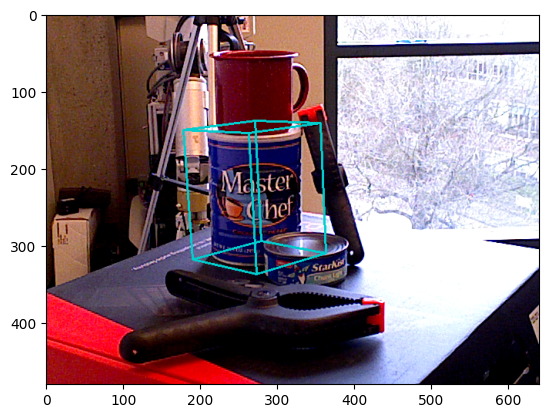

Pose estimation time: 12.86031436920166
R_est: [[ 0.70808876 -0.70442969 -0.04887852]
 [-0.15758237 -0.09016671 -0.98338078]
 [ 0.68831541  0.70402328 -0.17485173]]
t_est: [-33.48072189  -8.27153873 876.76754451]


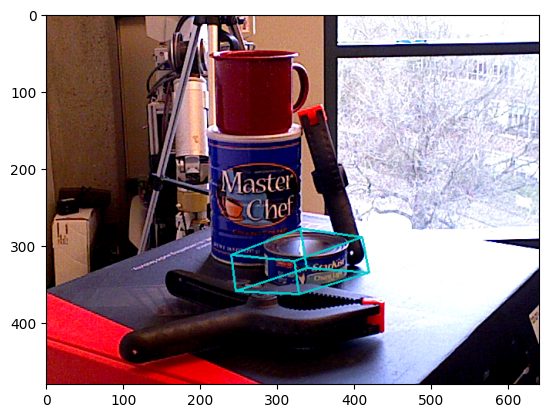

Pose estimation time: 10.763582706451416
R_est: [[ 0.7261752   0.67184613 -0.14591899]
 [-0.2980751   0.11640837 -0.94741771]
 [-0.61953274  0.73148607  0.28479347]]
t_est: [ 11.79707113  57.87620909 744.42373553]


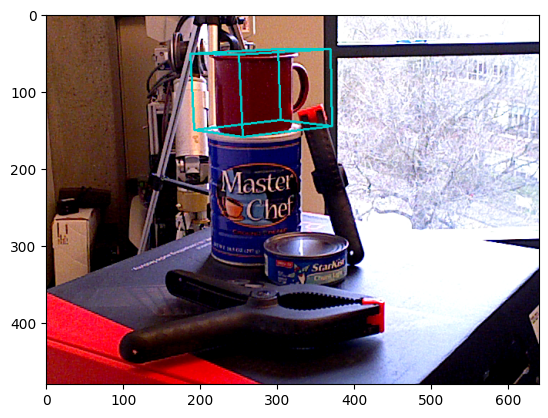

Pose estimation time: 11.219970464706421
R_est: [[ 0.79573812 -0.60481912 -0.03153845]
 [-0.14916819 -0.14525255 -0.97808514]
 [ 0.58698356  0.78300417 -0.20580276]]
t_est: [ -27.00718669 -117.73270033  880.58296272]


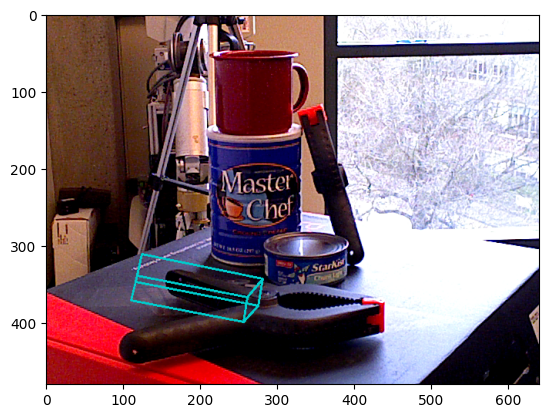

Pose estimation time: 10.383830547332764
R_est: [[ 0.22052503  0.96461274  0.14453709]
 [-0.32456119  0.21231097 -0.92172886]
 [-0.91979821  0.15635316  0.35989574]]
t_est: [-133.14916284  130.15621793 1189.56100844]


/run/media/kilian/Extern_SSD/Robot_Vision/ZS6D/pose_utils/vis_utils.py:87: RuntimeWarning: invalid value encountered in cast
  pose = eDbox_flat.astype(np.uint16)


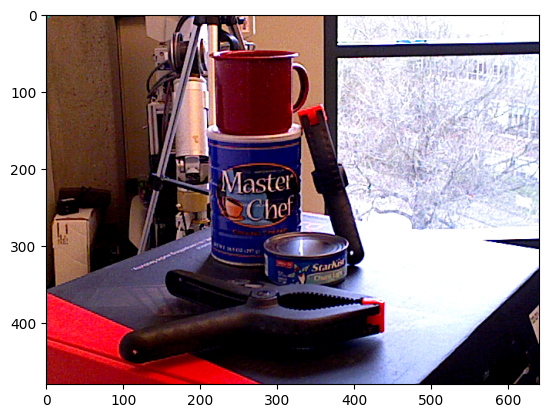

Pose estimation time: 10.674957752227783
R_est: [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
t_est: [4.94065646e-324 9.27135095e-310 1.39064683e-309]


In [4]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    # own test
    img_path = os.path.join('test/', '000001.png')
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


